In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets,models,layers
import tensorflow as tf

In [3]:
df=pd.read_csv(r"C:\Users\PC\Downloads\Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
columns_to_drop=["RowNumber",'CustomerId', 'Surname','Geography','Gender']
df.drop(columns_to_drop,axis=1,inplace=True)

In [19]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


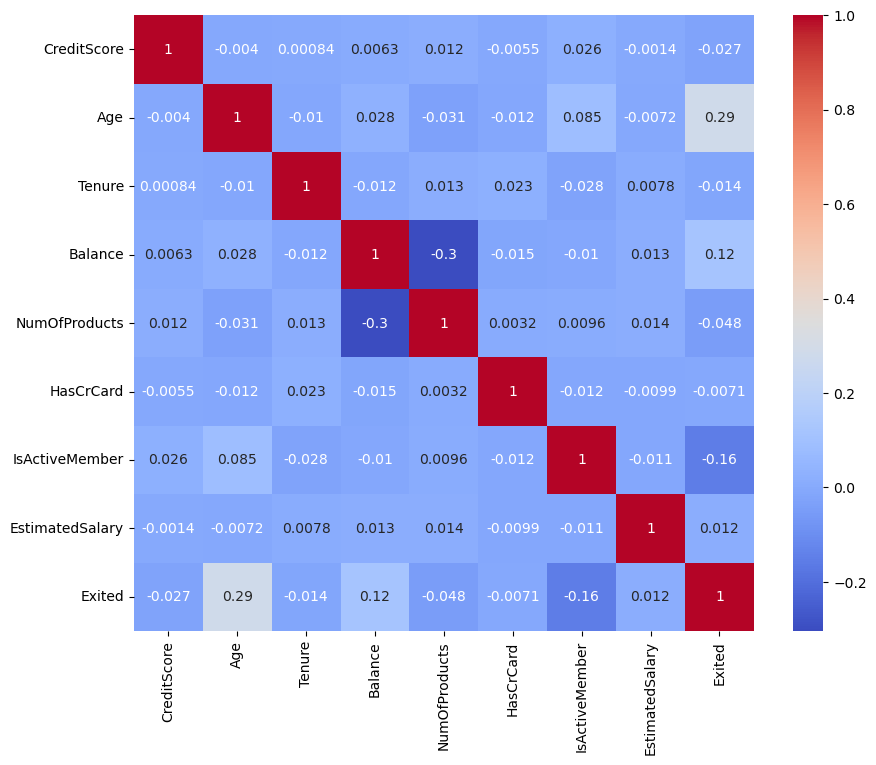

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [25]:
df.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [30]:
# plot a pie chart to get the percentages of the exited and no exited?
num_exited = df[df['Exited'] == 1].shape[0]
num_notexited = df[df['Exited'] == 0].shape[0]

In [32]:
print(num_exited,num_notexited)

2037 7963


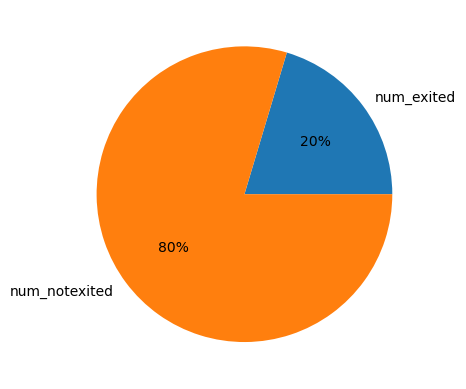

In [40]:
exp_vals = [2037,7963] #expenses 
exp_labels = ["num_exited","num_notexited"]
plt.pie(exp_vals,labels=exp_labels,autopct='%0.0f%%')
plt.show()

In [42]:
X=df.drop("Exited",axis=1)
y=df["Exited"]

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [46]:
X_train.shape

(8000, 8)

In [47]:
X_test.shape

(2000, 8)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [58]:
X_train_scaled

array([[ 0.27771515, -1.42385926, -1.72486066, ..., -1.53574811,
        -1.04109366,  1.45359333],
       [ 1.87959249, -1.1373084 ,  1.7271908 , ...,  0.65114845,
        -1.04109366, -1.19805904],
       [ 0.54641716, -0.65972364,  0.34637021, ..., -1.53574811,
        -1.04109366, -1.15106878],
       ...,
       [-0.13567255, -0.18213889,  1.0367805 , ...,  0.65114845,
         0.96052837,  1.50851722],
       [-2.10959883,  0.58199672,  1.7271908 , ...,  0.65114845,
         0.96052837,  0.50017238],
       [-0.49738679,  0.29544587,  0.34637021, ...,  0.65114845,
         0.96052837,  0.56342082]])

In [59]:
X_test_scaled

array([[ 0.04021172,  0.85414505,  1.36584669, ...,  0.62593007,
         1.0100505 , -0.28958699],
       [ 1.33987946, -1.04006141, -0.37519434, ...,  0.62593007,
        -0.9900495 ,  1.29921013],
       [ 0.18577451, -0.85064076, -0.72340255, ..., -1.59762257,
        -0.9900495 , -1.70007668],
       ...,
       [ 0.60166819,  0.75943472, -0.02698614, ..., -1.59762257,
        -0.9900495 , -0.31949803],
       [ 0.28974793, -1.13477173, -0.72340255, ...,  0.62593007,
        -0.9900495 , -1.19662242],
       [ 0.32093995, -0.28237883,  0.66943028, ...,  0.62593007,
        -0.9900495 ,  0.0462744 ]])

In [71]:
# bulid the first ANN ( deep learning model) ?
ANN=models.Sequential([
    layers.Dense(3000,input_shape=(8,),activation="relu"),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

In [73]:
ANN.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ANN.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3693 - accuracy: 0.8510
Epoch 2/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3605 - accuracy: 0.8540
Epoch 3/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3564 - accuracy: 0.8540
Epoch 4/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3524 - accuracy: 0.8558
Epoch 5/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3496 - accuracy: 0.8580
Epoch 6/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3471 - accuracy: 0.8579
Epoch 7/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3449 - accuracy: 0.8589
Epoch 8/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3433 - accuracy: 0.8587
Epoch 9/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3420 - accuracy: 0.8600
Epoch 10/100
250/250 [==============================] - 3s 11ms/step - loss: 0.340

250/250 [==============================] - 3s 12ms/step - loss: 0.2771 - accuracy: 0.8800
Epoch 81/100
250/250 [==============================] - 3s 12ms/step - loss: 0.2750 - accuracy: 0.8811
Epoch 82/100
250/250 [==============================] - 3s 12ms/step - loss: 0.2768 - accuracy: 0.8783
Epoch 83/100
250/250 [==============================] - 3s 11ms/step - loss: 0.2710 - accuracy: 0.8842
Epoch 84/100
250/250 [==============================] - 3s 11ms/step - loss: 0.2735 - accuracy: 0.8840
Epoch 85/100
250/250 [==============================] - 3s 10ms/step - loss: 0.2735 - accuracy: 0.8820
Epoch 86/100
250/250 [==============================] - 3s 11ms/step - loss: 0.2714 - accuracy: 0.8801
Epoch 87/100
250/250 [==============================] - 3s 11ms/step - loss: 0.2708 - accuracy: 0.8842
Epoch 88/100
250/250 [==============================] - 3s 11ms/step - loss: 0.2697 - accuracy: 0.8851
Epoch 89/100
250/250 [==============================] - 3s 11ms/step - loss: 0.2705 - 

In [74]:
ANN.evaluate(X_test_scaled,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8300


[0.4134148061275482, 0.8299999833106995]

In [75]:
y_pred = ANN.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

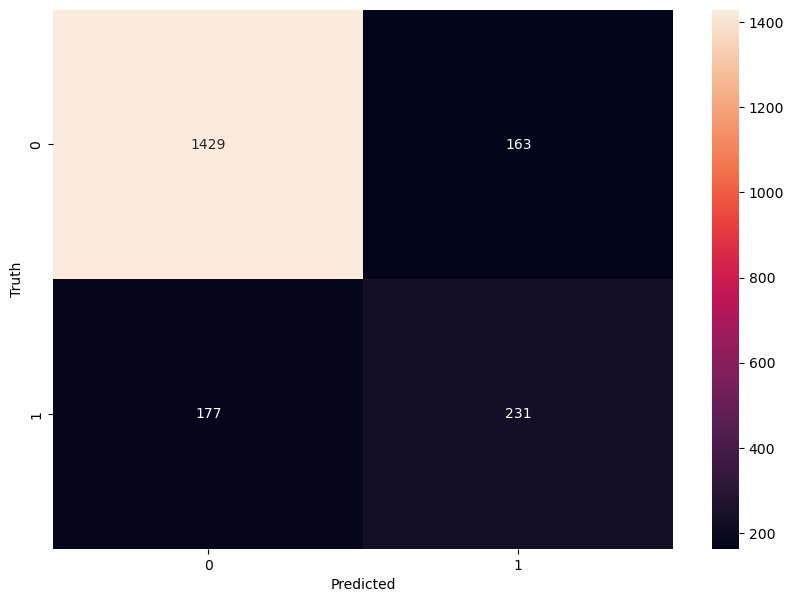

In [81]:
y_pred_labels = [np.argmax(element) for element in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')